
Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv

In [1]:
import pandas as pd

file_path = "https://drive.google.com/file/d/1JMYqXipZpz9Y5-vyxvLEO2Y1sRBxqu-U/view"
file_id = file_path.split("/")[-2]
download_link = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(download_link)
df

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,8700,QA engineer,NaN,Manual QA,1,меньше 3 месяцев,700,700,Одесса,до 50 человек,...,False,средний,"Android,Desktop Applications",12/07/2017 15:45:24,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,1.0,0.0,700,NaN,QA
8700,8701,Marketing,NaN,NaN,0.5,0.5,400,120,Киев,до 50 человек,...,False,ниже среднего,eCommerce,12/07/2017 17:00:06,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,NaN
8701,8702,Junior Software Engineer,Ruby/Rails,NaN,1,0.5,800,500,Львов,до 10 человек,...,False,выше среднего,"Веб-разработка,Корпоративные системы",12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800,NaN,DEV
8702,8703,Team lead,NaN,NaN,6,4,2600,0,Днепр,свыше 1000 человек,...,False,продвинутый,Финансы и банки,12/07/2017 18:14:59,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,6.0,4.0,2600,NaN,PM


Прочитайте отриману таблицю, використовуючи метод head

In [ ]:
print("Перші 5 рядків таблиці:")
df.head()

Перші 5 рядків таблиці:


,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


Визначте розмір таблиці за допомогою методу shape

In [ ]:
print("\nРозмір таблиці:")
df.shape


Розмір таблиці:


(8704, 25)

Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [2]:
print("\nТипи стовпців:")
df.dtypes


Типи стовпців:


N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)


In [4]:
print("\nЧастка пропусків в кожному стовпці:")
df.isnull().sum() / len(df) * 100


Частка пропусків в кожному стовпці:


N                                    0.000000
Должность                            0.000000
Язык.программирования               44.232537
Специализация                       82.938879
Общий.опыт.работы                    0.000000
Опыт.работы.на.текущем.месте         0.000000
Зарплата.в.месяц                     0.000000
Изменение.зарплаты.за.12.месяцев     0.000000
Город                                0.000000
Размер.компании                      0.000000
Тип.компании                         0.000000
Пол                                  0.000000
Возраст                              0.000000
Образование                          0.000000
Университет                          4.113051
Еще.студент                          0.000000
Уровень.английского                  0.000000
Предметная.область                   2.562040
Дата.заполнения                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                   

Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"

In [5]:
df = df.dropna(subset=['Язык.программирования'])
df

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV
6,7,Junior Software Engineer,C#/.NET,NaN,1,меньше 3 месяцев,600,100,Хмельницкий,до 50 человек,...,False,ниже среднего,Веб-разработка,12/06/2017 13:04:26,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.0,0.0,600,NaN,DEV
7,8,Senior Software Engineer,C++,NaN,6,1,3300,500,Киев,до 10 человек,...,False,выше среднего,Другое,12/06/2017 13:04:27,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,6.0,1.0,3300,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8692,8693,Software Engineer,Java,NaN,5,1,3500,650,Удаленно,до 200 человек,...,False,средний,eCommerce,12/07/2017 13:26:49,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,3500,NaN,DEV
8694,8695,Junior Software Engineer,C#/.NET,NaN,1,1,550,550,Харьков,до 200 человек,...,False,ниже среднего,"Desktop Applications,Системное программирование",12/07/2017 14:14:33,Mozilla/5.0 (Windows NT 10.0; WOW64; rv:54.0) ...,1.0,1.0,550,NaN,DEV
8695,8696,Software Engineer,Python,NaN,1,0.5,1500,1000,Киев,до 10 человек,...,False,средний,"Финансы и банки,eCommerce",12/07/2017 14:39:21,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,1500,NaN,DEV
8701,8702,Junior Software Engineer,Ruby/Rails,NaN,1,0.5,800,500,Львов,до 10 человек,...,False,выше среднего,"Веб-разработка,Корпоративные системы",12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800,NaN,DEV


Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"


In [7]:
print("\nЧастка пропусків після видалення:")
df.isnull().sum() / len(df) * 100


Частка пропусків після видалення:


N                                    0.000000
Должность                            0.000000
Язык.программирования                0.000000
Специализация                       99.979398
Общий.опыт.работы                    0.000000
Опыт.работы.на.текущем.месте         0.000000
Зарплата.в.месяц                     0.000000
Изменение.зарплаты.за.12.месяцев     0.000000
Город                                0.000000
Размер.компании                      0.000000
Тип.компании                         0.000000
Пол                                  0.000000
Возраст                              0.000000
Образование                          0.000000
Университет                          4.758962
Еще.студент                          0.000000
Уровень.английского                  0.000000
Предметная.область                   0.618047
Дата.заполнения                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                   

Видаліть усі рядки у вихідній таблиці за допомогою методу dropna

In [8]:
df = df.dropna()
df

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls


Визначте новий розмір таблиці за допомогою методу shape

In [9]:
print("\nРозмір таблиці після видалення рядків:")
df.shape


Розмір таблиці після видалення рядків:


(0, 25)

Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python


In [19]:
file_path = "https://drive.google.com/file/d/1JMYqXipZpz9Y5-vyxvLEO2Y1sRBxqu-U/view"
file_id = file_path.split("/")[-2]
download_link = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(download_link)
python_data = df[df['Язык.программирования'] == 'Python']
python_data

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
12,13,Software Engineer,Python,NaN,1,меньше 3 месяцев,800,200,Киев,до 50 человек,...,False,ниже среднего,"Веб-разработка,Другое",12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800,NaN,DEV
68,69,Software Engineer,Python,NaN,1.5,0.5,900,900,Киев,до 10 человек,...,True,выше среднего,Веб-разработка,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900,NaN,DEV
87,88,Junior Software Engineer,Python,NaN,0.5,0.5,600,0,Киев,до 10 человек,...,True,выше среднего,"Веб-разработка,eCommerce",12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600,NaN,DEV
114,115,Junior Software Engineer,Python,NaN,1.5,0.5,685,250,Киев,до 1000 человек,...,False,средний,Другое,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685,NaN,DEV
143,144,Junior Software Engineer,Python,NaN,1,1,750,250,Киев,до 10 человек,...,True,выше среднего,Веб-разработка,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8546,8547,Software Engineer,Python,NaN,5,1,2000,800,Запорожье,до 50 человек,...,False,средний,Веб-разработка,10/07/2017 14:11:26,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,2000,NaN,DEV
8625,8626,Software Engineer,Python,NaN,4,1,1750,0,Киев,свыше 1000 человек,...,False,средний,Веб-разработка,11/07/2017 16:15:40,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,4.0,1.0,1750,NaN,DEV
8635,8636,Senior Software Engineer,Python,NaN,10 и более лет,меньше 3 месяцев,4000,1300,Удаленно,до 10 человек,...,False,выше среднего,Веб-разработка,11/07/2017 17:51:36,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,10.0,0.0,4000,NaN,DEV
8673,8674,Junior Software Engineer,Python,NaN,0.5,0.5,350,50,Киев,до 50 человек,...,False,средний,Веб-разработка,12/07/2017 09:37:16,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,0.5,0.5,350,NaN,DEV


Визначте розмір таблиці python_data за допомогою методу shape

In [20]:
print("\nРозмір таблиці python_data:")
python_data.shape


Розмір таблиці python_data:


(207, 25)

Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"


In [21]:
grouped_data = df.groupby('Должность').agg({'Зарплата.в.месяц': ['min', 'max']})
grouped_data

Зарплата.в.месяц       
                                                        min    max
Должность                                                         
Business analyst                                        200   5000
DBA                                                     380   6000
Data Scientist / Data Analyst                           150   8000
Designer                                                100   4000
DevOps                                                  194  10000
Director of Engineering / Program Director             1500  34000
ERP / CRM                                               100   6000
Game designer                                           150   6800
HR                                                      100   7000
HTML coder                                              154   3000
Junior QA engineer                                       96   2000
Junior Software Engineer                                 75   2600
Marketing                                               100   4000
Product Manager                                         250   5000
Project manager                                         190   8000
QA Tech Lead                                            430   6000
QA engineer                                             150   2900
Research Engineer                                       114   4000
Sales manager                                           120   2300
Scrum Master                                            370   4500
Security Specialist                                     300   4000
Senior Project Manager / Program Manager                200   9100
Senior QA engineer                                      400   6000
Senior Software Engineer                                350   9200
Software Engineer                                       100   7000
Support                                                 138   3650
Sysadmin                                                 90   3000
System Architect                                        400  10000
Talent Researcher                                       100   1700
Team lead                                               300   7000
Technical Lead                                          500  18000
Technical writer                                        200   3000

Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"

In [34]:
def fill_avg_salary(salary_values):
    return salary_values.mean()

grouped_data['avg'] = grouped_data.apply(lambda x: fill_avg_salary(x['Зарплата.в.месяц']), axis=1)
grouped_data

Зарплата.в.месяц             avg
                                                        min    max         
Должность                                                                  
Business analyst                                        200   5000   2600.0
DBA                                                     380   6000   3190.0
Data Scientist / Data Analyst                           150   8000   4075.0
Designer                                                100   4000   2050.0
DevOps                                                  194  10000   5097.0
Director of Engineering / Program Director             1500  34000  17750.0
ERP / CRM                                               100   6000   3050.0
Game designer                                           150   6800   3475.0
HR                                                      100   7000   3550.0
HTML coder                                              154   3000   1577.0
Junior QA engineer                                       96   2000   1048.0
Junior Software Engineer                                 75   2600   1337.5
Marketing                                               100   4000   2050.0
Product Manager                                         250   5000   2625.0
Project manager                                         190   8000   4095.0
QA Tech Lead                                            430   6000   3215.0
QA engineer                                             150   2900   1525.0
Research Engineer                                       114   4000   2057.0
Sales manager                                           120   2300   1210.0
Scrum Master                                            370   4500   2435.0
Security Specialist                                     300   4000   2150.0
Senior Project Manager / Program Manager                200   9100   4650.0
Senior QA engineer                                      400   6000   3200.0
Senior Software Engineer                                350   9200   4775.0
Software Engineer                                       100   7000   3550.0
Support                                                 138   3650   1894.0
Sysadmin                                                 90   3000   1545.0
System Architect                                        400  10000   5200.0
Talent Researcher                                       100   1700    900.0
Team lead                                               300   7000   3650.0
Technical Lead                                          500  18000   9250.0
Technical writer                                        200   3000   1600.0

Створіть описову статистику за допомогою методу describe для нового стовпчика.

In [35]:
print("\nОписова статистика для стовпчика 'avg':")
grouped_data['avg'].describe()


Описова статистика для стовпчика 'avg':


count       32.000000
mean      3449.234375
std       3093.885174
min        900.000000
25%       1820.500000
50%       2837.500000
75%       3756.250000
max      17750.000000
Name: avg, dtype: float64

Збережіть отриману таблицю в CSV файл

In [36]:
df.to_csv('output_file.csv', index=False)
df

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,8700,QA engineer,NaN,Manual QA,1,меньше 3 месяцев,700,700,Одесса,до 50 человек,...,False,средний,"Android,Desktop Applications",12/07/2017 15:45:24,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,1.0,0.0,700,NaN,QA
8700,8701,Marketing,NaN,NaN,0.5,0.5,400,120,Киев,до 50 человек,...,False,ниже среднего,eCommerce,12/07/2017 17:00:06,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,NaN
8701,8702,Junior Software Engineer,Ruby/Rails,NaN,1,0.5,800,500,Львов,до 10 человек,...,False,выше среднего,"Веб-разработка,Корпоративные системы",12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800,NaN,DEV
8702,8703,Team lead,NaN,NaN,6,4,2600,0,Днепр,свыше 1000 человек,...,False,продвинутый,Финансы и банки,12/07/2017 18:14:59,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,6.0,4.0,2600,NaN,PM


Додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші. Можна використовувати як matplotlib, так і seaborn.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

file_path = "https://drive.google.com/file/d/1JMYqXipZpz9Y5-vyxvLEO2Y1sRBxqu-U/view"
file_id = file_path.split("/")[-2]
download_link = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(download_link)

**Графік 1: Розподіл зарплати в місяць**

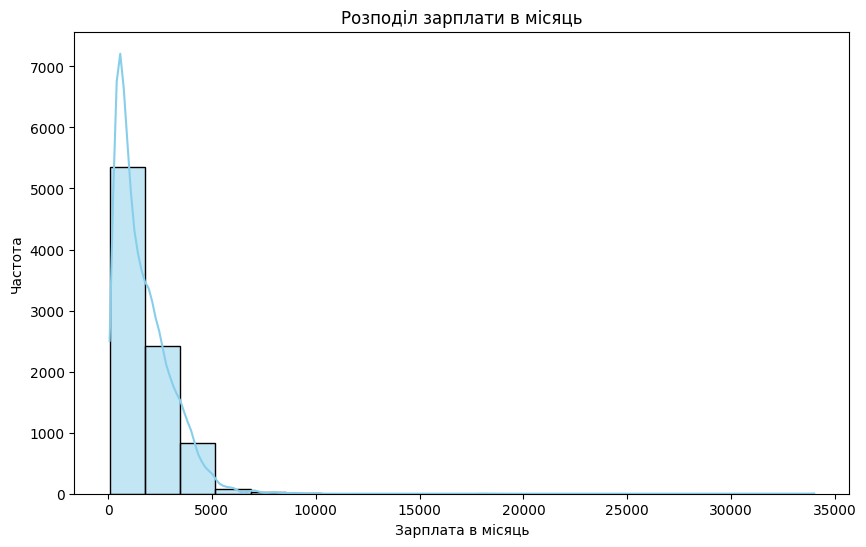

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

file_path = "https://drive.google.com/file/d/1JMYqXipZpz9Y5-vyxvLEO2Y1sRBxqu-U/view"
file_id = file_path.split("/")[-2]
download_link = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(download_link)
plt.figure(figsize=(10, 6))
sns.histplot(df['Зарплата.в.месяц'], bins=20, kde=True, color='skyblue')
plt.title('Розподіл зарплати в місяць')
plt.xlabel('Зарплата в місяць')
plt.ylabel('Частота')
plt.show()

**Графік 2: Box plot для розподілу зарплати за мовою програмування**

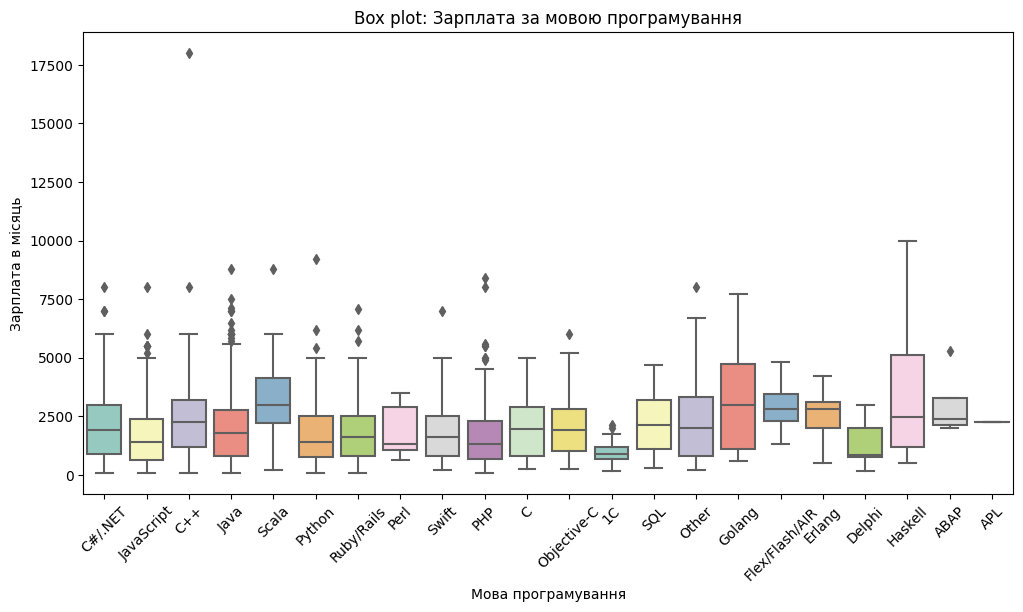

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Язык.программирования', y='Зарплата.в.месяц', data=df, palette='Set3')
plt.title('Box plot: Зарплата за мовою програмування')
plt.xlabel('Мова програмування')
plt.ylabel('Зарплата в місяць')
plt.xticks(rotation=45)
plt.show()

**Графік 3: Line plot для динаміки зміни зарплати за 12 місяців**

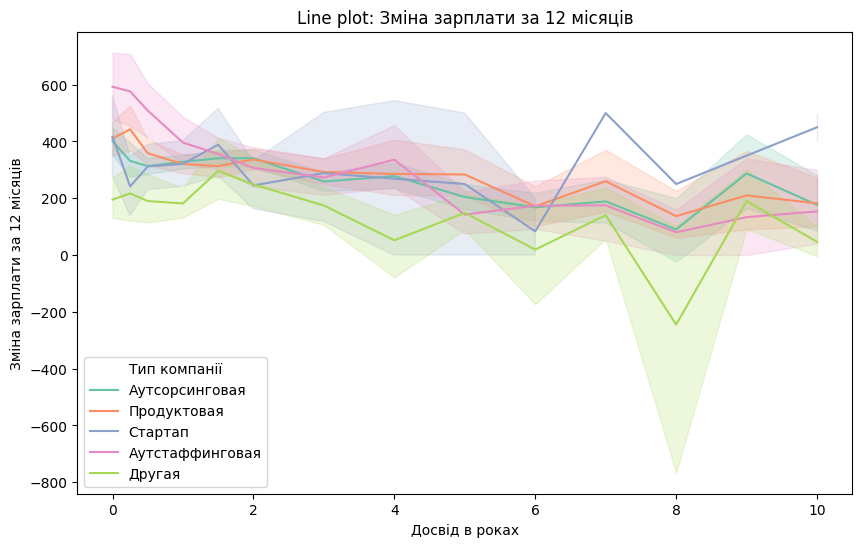

In [40]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='current_job_exp', y='Изменение.зарплаты.за.12.месяцев', data=df, hue='Тип.компании', palette='Set2')
plt.title('Line plot: Зміна зарплати за 12 місяців')
plt.xlabel('Досвід в роках')
plt.ylabel('Зміна зарплати за 12 місяців')
plt.legend(title='Тип компанії')
plt.show()

**Графік 4: Scatter plot для взаємодії общого та поточного досвіду роботи**

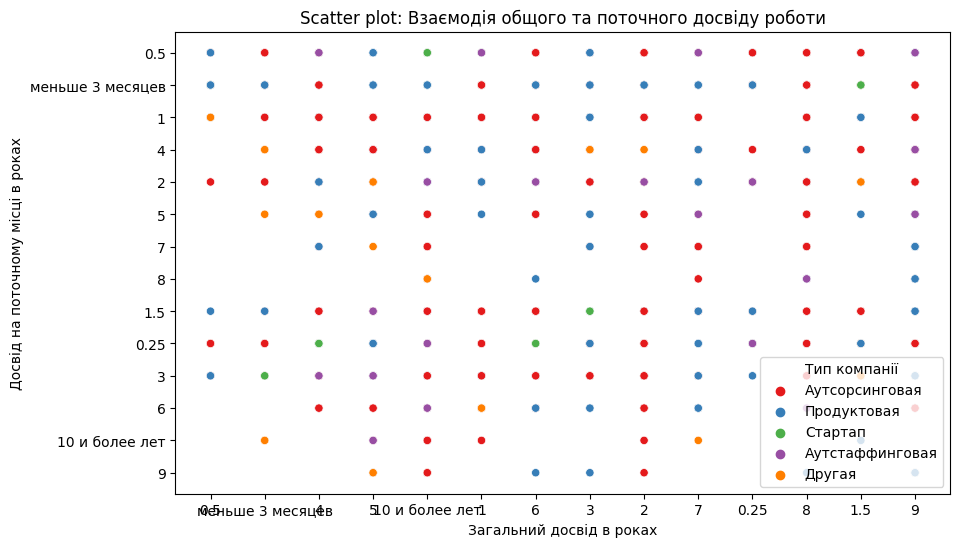

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Общий.опыт.работы', y='Опыт.работы.на.текущем.месте', data=df, hue='Тип.компании', palette='Set1')
plt.title('Scatter plot: Взаємодія общого та поточного досвіду роботи')
plt.xlabel('Загальний досвід в роках')
plt.ylabel('Досвід на поточному місці в роках')
plt.legend(title='Тип компанії')
plt.show()

**Графік 5: Count plot для розподілу за посадами**

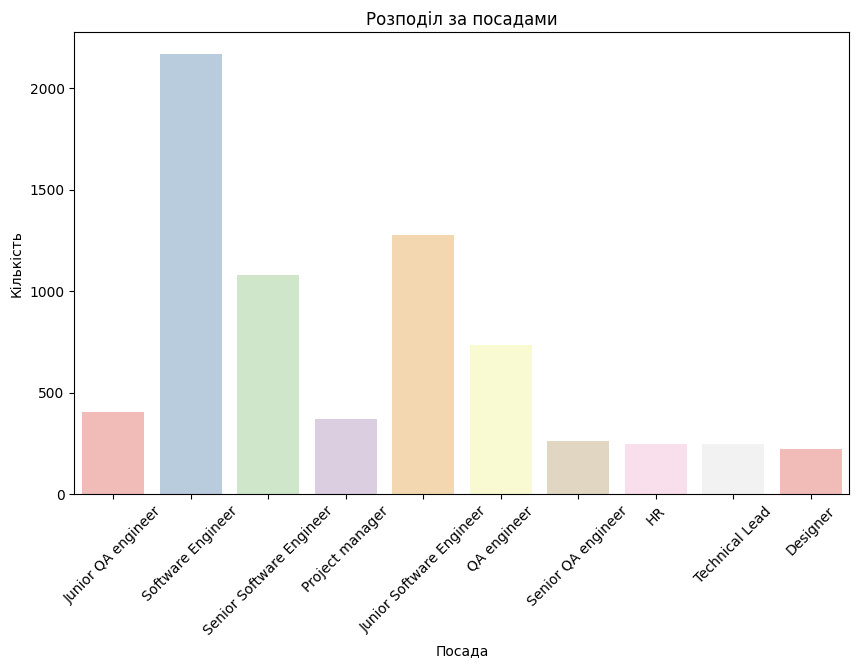

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
top_positions = df['Должность'].value_counts().head(10).index
plt.figure(figsize=(10, 6))
sns.countplot(x='Должность', data=df[df['Должность'].isin(top_positions)], palette='Pastel1')
plt.title('Розподіл за посадами')
plt.xlabel('Посада')
plt.ylabel('Кількість')
plt.xticks(rotation=45)
plt.show()
